In [1]:
from tied import TIEDModel
from transformers import AutoTokenizer
import torch
import matplotlib.pyplot as plt

In [2]:
# Load model and tokenizer
model = TIEDModel.from_pretrained("models/checkpoint-500").to("cuda")
tokenizer = AutoTokenizer.from_pretrained("models/checkpoint-500")

In [3]:
def generate_image(prompt, z_step=32, device="cuda"):
    model.to(device)
    model.eval()
    model.config.z_step = z_step  # если используется внутри model.generate

    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    input_ids = inputs.input_ids
    attention_mask = inputs.attention_mask

    with torch.no_grad():
        generated_latents = model.generate(
            input_ids=input_ids,
            attention_mask=attention_mask
        )  # [B, T, C, H, W]

    print("Generated Latents Shape:", generated_latents.shape)

    last_latent = generated_latents[:, -1]  # [B, C, H, W]
    print("Last Latent Shape:", last_latent.shape)

    decoded = model.vae.decode(last_latent).sample  # [B, 3, H, W]
    decoded = (decoded / 2 + 0.5).clamp(0, 1)

    img_np = decoded.squeeze().permute(1, 2, 0).detach().cpu().numpy()

    plt.imshow(img_np)
    plt.axis('off')
    plt.savefig("output_image.png", bbox_inches='tight', pad_inches=0)
    plt.show()

    return generated_latents


Generating Latents: 100%|██████████| 3/3 [00:00<00:00, 113.97it/s]

Generated Latents Shape: torch.Size([1, 4, 4, 16, 16])
Last Latent Shape: torch.Size([1, 4, 16, 16])


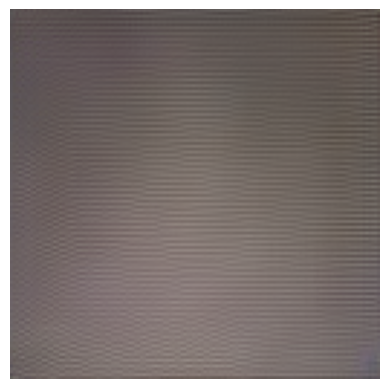

In [15]:


prompt = """

white"""

generated_latents = generate_image(prompt, z_step=4)

In [96]:
generated_latents.shape  # [B, T, C, H, W]

torch.Size([1, 128, 4, 8, 8])

In [94]:
generated_latents[:,0, :1, :1, :4]

tensor([[[[ 0.0122,  0.0038,  0.0036, -0.0007]]]], device='cuda:0')

In [93]:
generated_latents[:,1, :1, :1, :4]

tensor([[[[0.1185, 0.0589, 0.0251, 0.0228]]]], device='cuda:0')